In [112]:
import os
import matplotlib.pyplot as plt
import random
import shutil
# from PIL import Image
import cv2
import pandas as pd
import numpy as np 

In [113]:
def sampling_image(path,destination,num=5):
    """This function use for sampling data randomly
    input:directory for resource data
    output: new dicrectory for new sampling data
    """
    #get path directory
    directory=os.path.dirname(path)
    folders=os.listdir(directory)

    #loop for each folders
    for folder in folders:
        #get folder for each image
        fruits=os.path.join(directory,folder)
        listFruits=os.listdir(fruits)
        #get length for each fruits
        numFruits=len(listFruits)
        #create new directories output image
        dirOutput=os.path.join(destination,folder)
        os.makedirs(dirOutput,exist_ok=True)
        #loop image to sampling randomly
        for i in range(num):
            #create random number for sampling image
            randomNumber=random.randint(0,numFruits-1)
            image=listFruits[randomNumber]
            #copy images to new destination
            shutil.copyfile(os.path.join(fruits,image),os.path.join(dirOutput,image))




In [114]:
def compare_dataset(paths):
    """
    This function has abilities to compare visualization between two datasets


    input:array
    output:visualization between image form both datasets
    """
    #find num class
    path=paths[0]
    classes=os.listdir(path)
    numClasses=len(classes)

    fig, axs = plt.subplots(numClasses,2,figsize=(10,20))
    
    fig.suptitle("Visualization Both Dataset")


    #loop for folders
    indeksNumber=0
    for indeks,folder in enumerate(classes):
        #list image both folders
        dirFolder262=os.path.join(paths[0],folder)
        dirFolder362=os.path.join(paths[1],folder)
        listImage262=os.listdir(dirFolder262)
        listImage362=os.listdir(dirFolder362)

        for i in range(1):
            # Open the image
            img1 = cv2.imread(os.path.join(dirFolder262,listImage262[i]))
            img2 = cv2.imread(os.path.join(dirFolder362,listImage362[i]))
            
            # Plot the image in the respective subplot
            axs[indeks,0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
            axs[indeks,1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
            
            # # Set the title with the class label
            axs[indeks,0].set_title(f'{folder}-262')
            axs[indeks,1].set_title(f'{folder}-362')
            
            # # Remove axis ticks
            axs[indeks,0].axis('off')
            axs[indeks,1].axis('off')

        #update indexNumber
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()



In [115]:
def get_images(paths):
    """
    built a dict from image and added  maen of std for each image
    input: as array contain path for each folder
    ouput:
    """

    collect_mean={ #define a object cause we need to return 3 layers
        "x_label":[],
        "data":{
        "red":[],
        "green":[],
        "blue":[]
        }
    }
    #collection each data from path
    images=concatenating_data(paths)
    #deterimine path start from frist path
    for i,image in enumerate(images):
        [r,g,b]=std_image(image)


        # find a number in sentences
        n_name= i
        # collected
        collect_mean['data']["red"].append(r)
        collect_mean['data']["green"].append(g)
        collect_mean['data']["blue"].append(b)
        collect_mean['x_label'].append(f"g_{n_name}")
    return collect_mean

def std_image(image):
    """This function has abilities find the standart deviation from an image """
    # Read the image
    read_image= cv2.imread(image)
    # Split the image into its color channels
    blue_channel, green_channel, red_channel = cv2.split(read_image)
    # Calculate standard deviation across all axes (pixels) and channels
    blue_std = np.std(blue_channel)
    green_std = np.std(green_channel)
    red_std = np.std(red_channel)
    
    # return as array for each images
    return [red_std,blue_std,green_std]



def create_table(data_std,label):
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data_std, index=label)
    # change the name columns
    # Rename columns
    new_column_names = {'red': 'STD_Red', 'green': 'STD_Green', 'blue': 'STD_Blue'}
    df = df.rename(columns=new_column_names)

    # Calculate range for each column
    range_values = df.max() - df.min()
    # Create a new DataFrame with range values as a single row
    new_row = pd.DataFrame([range_values], columns=range_values.index,index=['Range (Max-Min)'])

    # Append the new row to the original DataFrame
    df = pd.concat([df,new_row])
    return df

def plotting_lines(data_mean,label,name_title):
    x = np.arange(len(label))  # the label locations
    multiplier = 0
    fig, ax = plt.subplots(layout='constrained')
    for attribute, measurement in data_mean.items():
        ax.plot(x, measurement, label=attribute,color=attribute)  # Using plot instead of bar for line graph
        multiplier += 1
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('size')
    ax.set_title(f'Standart Deviation 3 Layers (RGB) From images for {name_title}')
    ax.set_xticks(x)
    ax.set_xticklabels(label)
    ax.set_ylim(0, 250)

    ax.legend()  # Create the legend after all plots have been added

    plt.show()


In [116]:
def concatenating_data(paths:list):
    """
    at this section concatenating two array

    input:(Array)
    output:(array)
    """
    result=np.array([])
    num_class=0
    #loops from path
    for path in paths:
      current_images=os.listdir(path)
      newPathImg=np.array([])
        #loop for each image
      for image in current_images:
        #construct with path
         newPathImg=np.append(newPathImg,os.path.join(path,image))
      result=np.append(result,newPathImg)
      num_class=len(current_images)

    return result

    

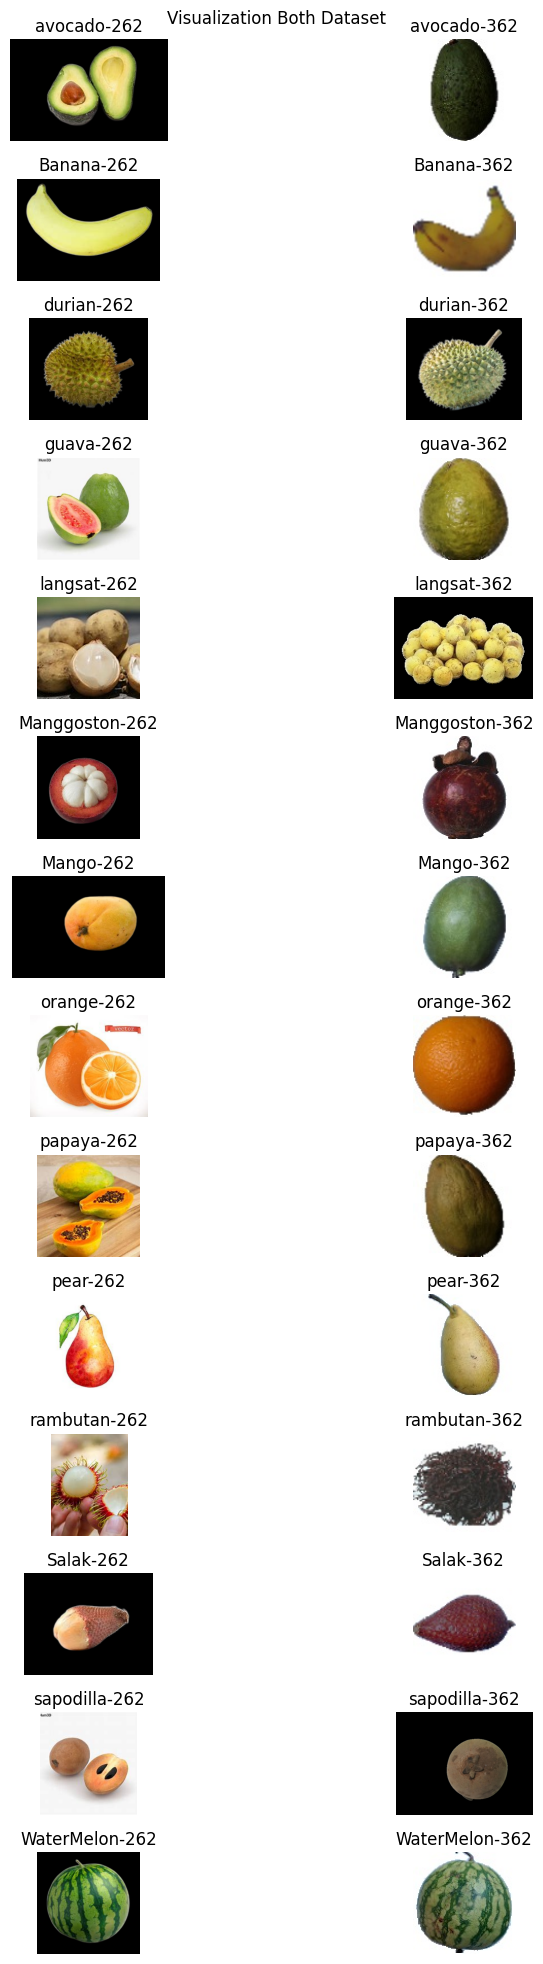

In [117]:

# sampling_image("D:/DATASET_FRUITS/mine/FINAL/FIX/362-dataset/","RandomSampling362")


compare_dataset(["./RandomSampling262","./RandomSampling362"])

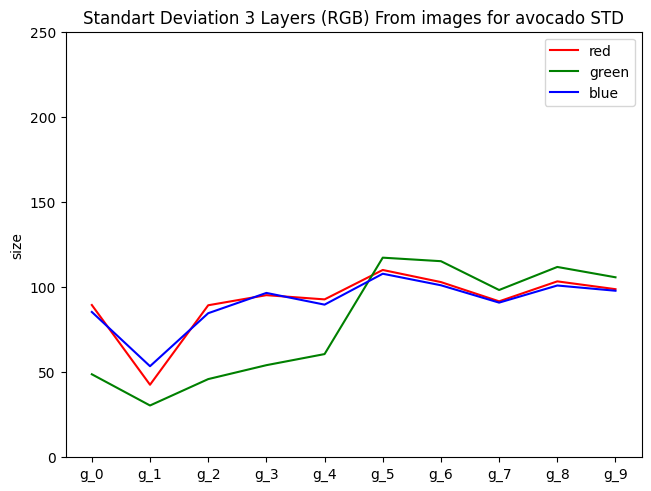

dataset avocado
                    STD_Red   STD_Green    STD_Blue
g_0               89.438435   48.757908   85.357046
g_1               42.607627   30.421371   53.492670
g_2               89.292532   45.920993   84.623004
g_3               95.221376   54.099958   96.541183
g_4               92.744433   60.617251   89.657952
g_5              110.020726  117.251545  107.806704
g_6              102.907004  115.181026  101.033002
g_7               91.601369   98.255670   90.839041
g_8              103.327921  111.795167  100.899402
g_9               98.740805  105.723591   97.822669
Range (Max-Min)   67.413099   86.830174   54.314034


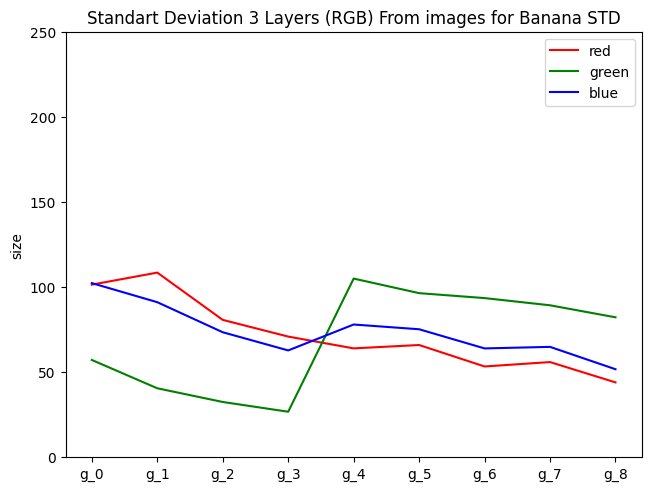

dataset Banana
                    STD_Red   STD_Green    STD_Blue
g_0              101.400442   57.160687  102.303112
g_1              108.478693   40.529887   91.091809
g_2               80.704510   32.482484   73.445086
g_3               70.897285   26.750814   62.765161
g_4               63.972027  104.968161   77.984270
g_5               65.944869   96.408049   75.197815
g_6               53.336184   93.503472   63.941943
g_7               55.922273   89.276573   64.853421
g_8               43.986466   82.214876   51.721245
Range (Max-Min)   64.492227   78.217347   50.581867


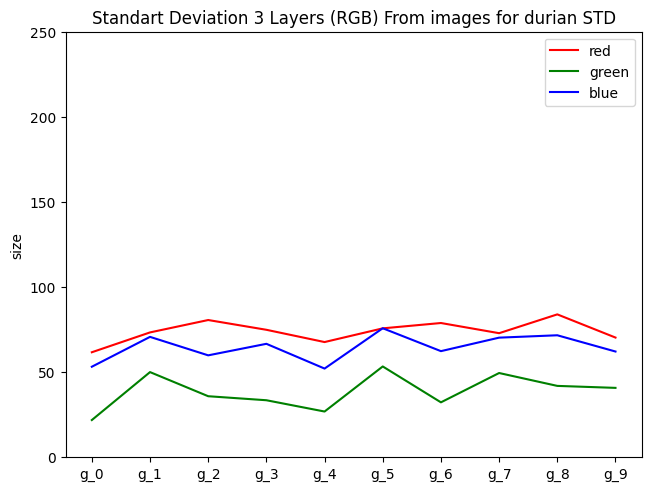

dataset durian
                   STD_Red  STD_Green   STD_Blue
g_0              61.688992  21.870532  53.185901
g_1              73.342761  50.032391  70.727709
g_2              80.621221  35.863767  59.873091
g_3              74.886288  33.501691  66.647130
g_4              67.680379  26.870748  52.109124
g_5              75.731332  53.347244  75.790031
g_6              78.866339  32.272828  62.343710
g_7              72.888497  49.493041  70.269270
g_8              83.939126  41.931021  71.665688
g_9              70.318302  40.767146  62.122229
Range (Max-Min)  22.250133  31.476712  23.680907


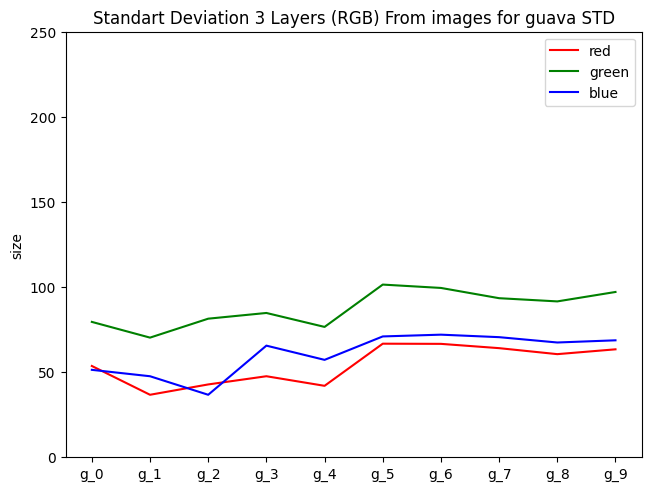

dataset guava
                   STD_Red   STD_Green   STD_Blue
g_0              53.629577   79.524536  51.359818
g_1              36.715109   70.283575  47.602523
g_2              42.788086   81.410128  36.713514
g_3              47.603768   84.766716  65.577613
g_4              41.970477   76.572805  57.223625
g_5              66.719367  101.436654  70.983232
g_6              66.621004   99.468827  72.023009
g_7              64.098680   93.442870  70.553880
g_8              60.578132   91.560592  67.422202
g_9              63.412966   97.095795  68.704709
Range (Max-Min)  30.004257   31.153079  35.309494


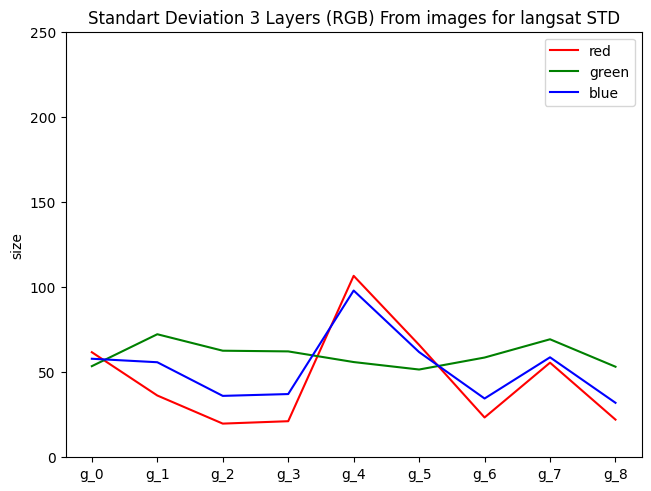

dataset langsat
                    STD_Red  STD_Green   STD_Blue
g_0               61.716030  53.515969  57.875523
g_1               36.290124  72.271071  55.825829
g_2               19.778303  62.597244  36.066073
g_3               21.187518  62.193138  37.133537
g_4              106.575395  55.934166  97.942779
g_5               66.019349  51.544402  61.788489
g_6               23.382610  58.585251  34.517876
g_7               55.569534  69.311893  58.721438
g_8               22.124287  53.192669  31.996772
Range (Max-Min)   86.797092  20.726669  65.946008


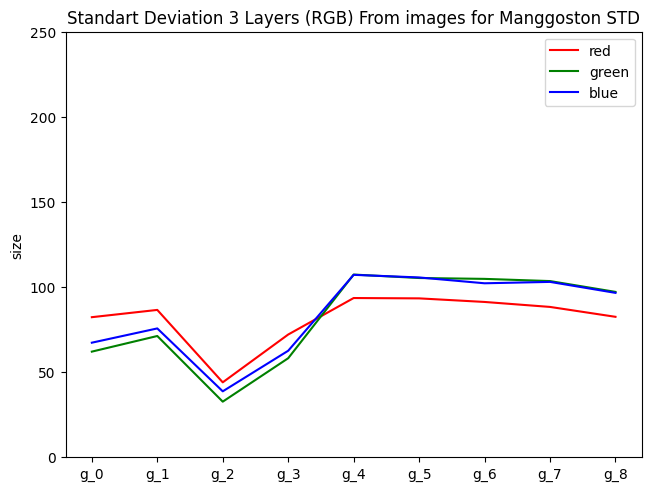

dataset Manggoston
                   STD_Red   STD_Green    STD_Blue
g_0              82.290056   62.054865   67.308917
g_1              86.560179   71.237958   75.685860
g_2              44.023777   32.670348   38.741930
g_3              72.107792   58.187380   62.580182
g_4              93.540612  107.330172  107.162866
g_5              93.337932  105.299579  105.627363
g_6              91.237368  104.789778  102.202399
g_7              88.315977  103.499768  103.017883
g_8              82.505558   97.142930   96.571586
Range (Max-Min)  49.516835   74.659823   68.420936


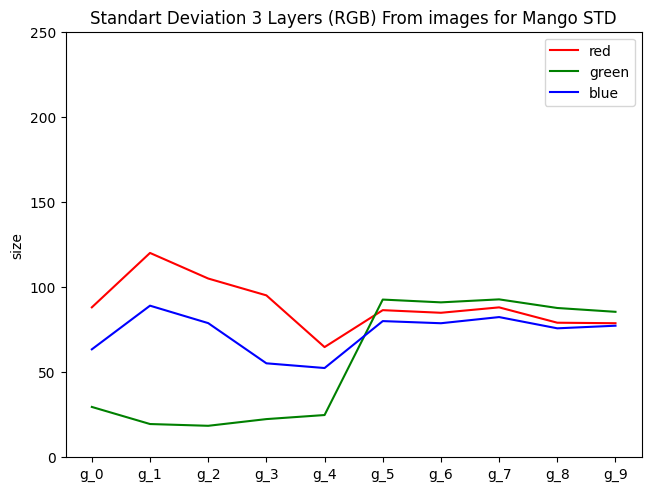

dataset Mango
                    STD_Red  STD_Green   STD_Blue
g_0               88.071223  29.570893  63.406572
g_1              120.027300  19.529830  89.049505
g_2              104.997257  18.492284  78.801242
g_3               95.102802  22.425458  55.194078
g_4               64.721665  24.814117  52.425907
g_5               86.417551  92.636355  79.990634
g_6               84.877074  90.998715  78.735268
g_7               88.054470  92.753955  82.352336
g_8               79.042032  87.688475  75.746723
g_9               78.742909  85.441509  77.283492
Range (Max-Min)   55.305635  74.261671  36.623598


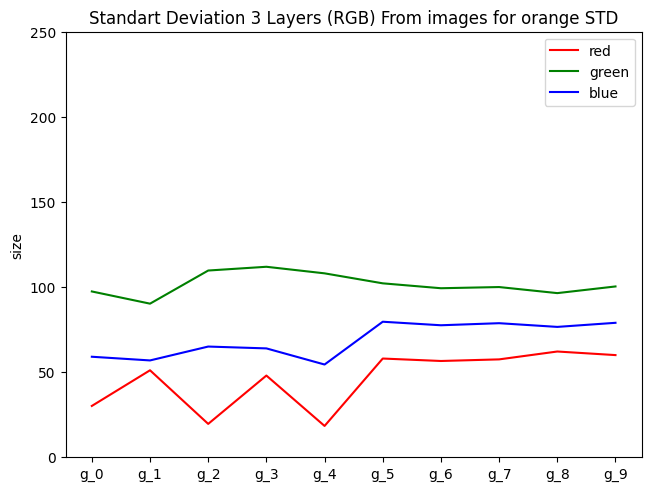

dataset orange
                   STD_Red   STD_Green   STD_Blue
g_0              30.155828   97.401501  59.051846
g_1              51.102458   90.233624  56.888947
g_2              19.611425  109.694609  65.035962
g_3              48.003042  111.901394  63.957022
g_4              18.406689  108.040451  54.483501
g_5              58.000423  102.172224  79.616699
g_6              56.559956   99.295412  77.544640
g_7              57.503671   99.992026  78.758655
g_8              62.126755   96.425706  76.584214
g_9              60.021823  100.341780  78.986901
Range (Max-Min)  43.720066   21.667769  25.133198


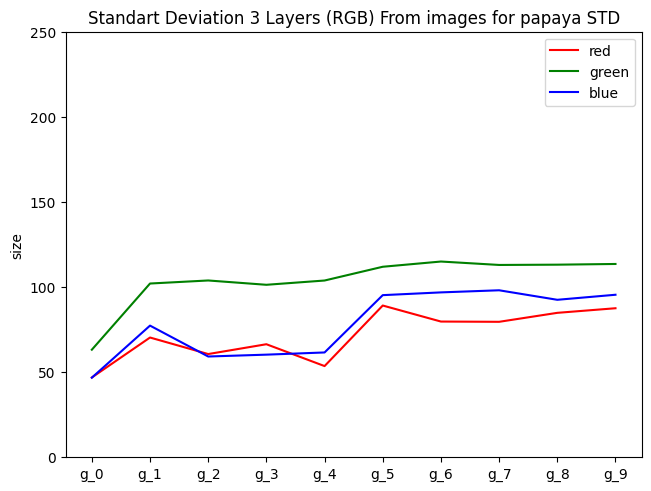

dataset papaya
                   STD_Red   STD_Green   STD_Blue
g_0              46.869194   63.184994  46.751455
g_1              70.343066  102.060224  77.340233
g_2              60.633963  103.852847  59.190899
g_3              66.404489  101.317567  60.281640
g_4              53.570203  103.826666  61.569544
g_5              89.138039  111.908811  95.234379
g_6              79.726139  114.978291  96.854976
g_7              79.572590  112.971604  98.091364
g_8              84.842037  113.134300  92.503383
g_9              87.541925  113.545354  95.465924
Range (Max-Min)  42.268845   51.793297  51.339908


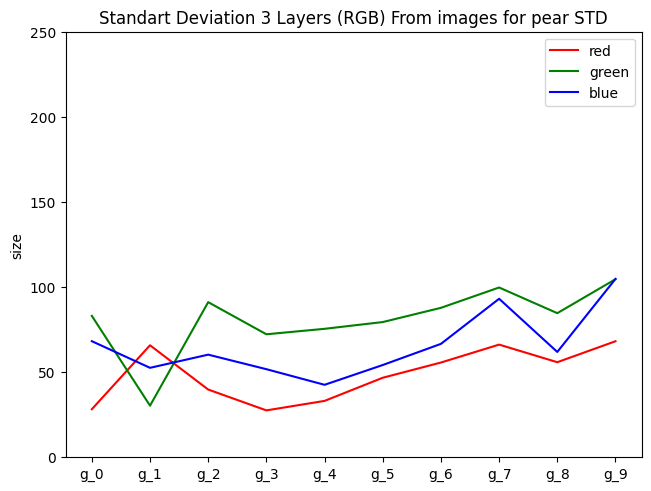

dataset pear
                   STD_Red   STD_Green    STD_Blue
g_0              28.225976   83.064072   68.189397
g_1              65.781460   30.317408   52.546346
g_2              39.780942   91.116066   60.280647
g_3              27.540725   72.247721   51.741809
g_4              33.116094   75.458348   42.565210
g_5              46.714736   79.426749   54.192967
g_6              55.655317   87.782131   66.616160
g_7              66.182260   99.729907   93.106864
g_8              55.843428   84.646170   61.871113
g_9              68.156621  104.602676  104.768852
Range (Max-Min)  40.615897   74.285268   62.203642


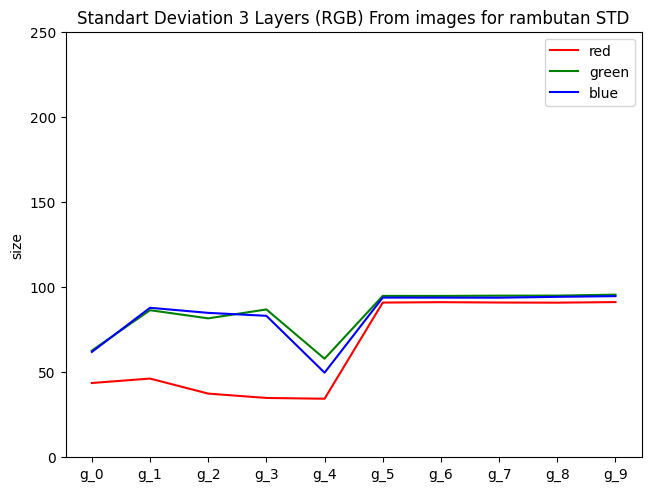

dataset rambutan
                   STD_Red  STD_Green   STD_Blue
g_0              43.622218  62.652770  61.874530
g_1              46.232062  86.396327  87.807282
g_2              37.405269  81.594832  84.824848
g_3              34.851494  86.843474  83.095394
g_4              34.384061  57.887209  49.697671
g_5              90.873614  94.790569  93.801214
g_6              91.102758  94.779862  93.782334
g_7              90.904891  94.928106  93.740526
g_8              90.822447  94.958696  94.244465
g_9              91.161450  95.521435  94.641474
Range (Max-Min)  56.777390  37.634227  44.943803


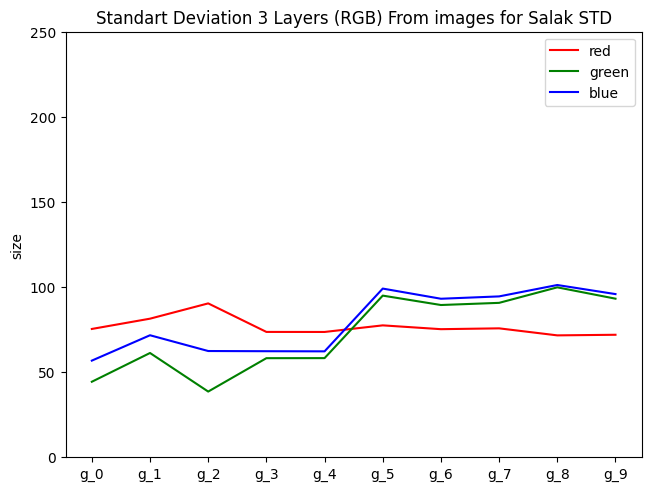

dataset Salak
                   STD_Red  STD_Green    STD_Blue
g_0              75.374645  44.364872   56.777650
g_1              81.415233  61.258018   71.677492
g_2              90.392466  38.596613   62.414047
g_3              73.634154  58.212817   62.304460
g_4              73.610706  58.246745   62.224570
g_5              77.485514  94.958729   99.090971
g_6              75.246300  89.440305   93.121776
g_7              75.733753  90.708115   94.500103
g_8              71.608129  99.818048  101.189642
g_9              71.960152  93.160119   95.854481
Range (Max-Min)  18.784336  61.221435   44.411993


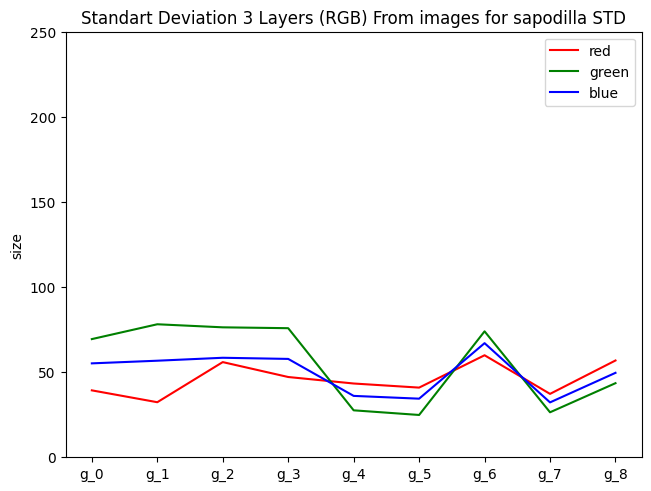

dataset sapodilla
                   STD_Red  STD_Green   STD_Blue
g_0              39.306869  69.415784  55.165554
g_1              32.341501  78.129518  56.721309
g_2              55.907576  76.332164  58.450053
g_3              47.149787  75.823976  57.776948
g_4              43.333253  27.579468  36.056949
g_5              40.924047  24.852540  34.425439
g_6              59.923866  73.977054  67.029873
g_7              37.239664  26.427302  32.238210
g_8              56.850865  43.528132  49.601050
Range (Max-Min)  27.582365  53.276978  34.791663


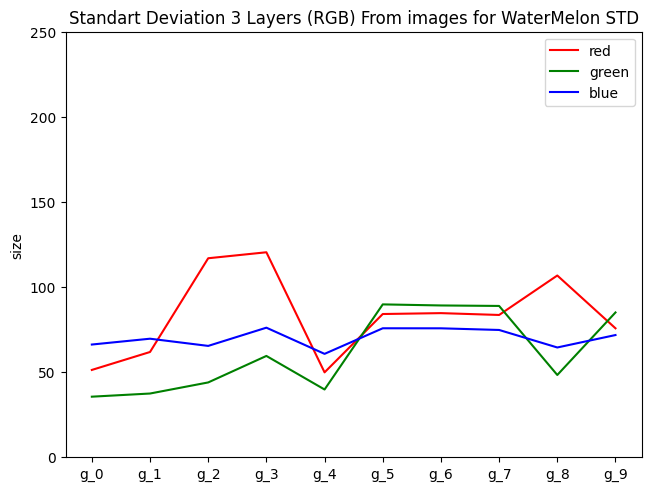

dataset WaterMelon
                    STD_Red  STD_Green   STD_Blue
g_0               51.301494  35.594565  66.224757
g_1               61.843434  37.448354  69.647784
g_2              116.906122  43.961864  65.419089
g_3              120.418382  59.527485  76.122914
g_4               49.882769  39.816846  60.746283
g_5               84.150168  89.805133  75.774012
g_6               84.671651  89.176438  75.751651
g_7               83.593688  88.893503  74.781314
g_8              106.770759  48.337440  64.495097
g_9               75.758368  85.070448  71.798996
Range (Max-Min)   70.535613  54.210567  15.376631


In [118]:
fruits=os.listdir("./RandomSampling262")
for fruit in fruits:
    # Construct image paths for mango
    fruit_paths = ["./RandomSampling262/" + fruit.lower(), "./RandomSampling362/" + fruit.lower()]
    
    # Get images data for the fruit
    fruit_data = get_images(fruit_paths)
    
    # Plotting the lines for the fruit
    plotting_lines(fruit_data['data'], fruit_data['x_label'], f"{fruit} STD")
    
    # Creating the table for the fruit
    fruit_table = create_table(fruit_data['data'], fruit_data['x_label'])
    
    # Print the table for the fruit
    print(f"dataset {fruit}")
    print(fruit_table)